# Tourism Case Study

### Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

### Read the dataset

In [2]:
# loading the dataset
data = pd.read_csv("Nutrient+Composition+Dataset.csv")

### View the random 10 rows of the dataset.

In [3]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,S.No,Protein,Fat,vitaminC,Fiber,Product
1010,1011,-0.490958,-0.614748,-1.100076,-0.601097,"Alcoholic beverage, wine, beer"
1582,1583,-1.160201,0.340049,-0.892182,1.898395,"Bean, sporouted seeds"
47,48,1.668056,1.767883,1.666838,-0.675627,"Beef, flank, steak, separable lean and fat, tr..."
304,305,-0.361130,0.188898,-1.412071,0.792773,"Fish, grouper, mixed species, cooked, dry heat"
534,535,-0.629738,0.305815,-0.438456,0.019764,"Soup, chicken, canned, chunky, ready-to-serve"
1123,1124,-0.969034,1.090557,2.286335,-0.496590,"Sorghum flour, whole-grain"
48,49,0.504296,-0.946973,-0.023497,-1.129559,"Bagels, plain, enriched, with calcium propiona..."
1584,1585,-0.546106,-0.238144,1.517469,0.472610,"Bean, sporouted seeds"
302,303,-1.058150,0.278420,1.124066,0.219585,"Cereals, CREAM OF WHEAT, instant, prepared wit..."
1032,1033,-0.935125,0.592144,-0.360597,-0.578787,"Alcoholic beverage, wine, beer"


In [4]:
data.shape

(1746, 6)

* The dataset has 229 rows and 14 columns 

In [5]:
# copying the data to another variable to avoid any changes to original data
df1 = data.copy()

In [30]:
df1['Product'].value_counts()

Alcoholic beverage, wine, beer                                                 542
Chicken, broilers or fryers, raw                                               284
Bean, sporouted seeds                                                           87
Drumstick pods, raw                                                              1
Pork, cured, ham, shank, bone-in, separable lean and fat, unheated               1
                                                                              ... 
Croutons, seasoned                                                               1
Crustaceans, crab, queen, cooked, moist heat                                     1
Crustaceans, spiny lobster, mixed species, cooked, moist heat                    1
Game meat, bison, top round, separable lean only, 1" steak, cooked, broiled      1
Muffin, blueberry, commercially prepared, low-fat                                1
Name: Product, Length: 836, dtype: int64

### Check the data types of the columns for the dataset.

In [6]:
# checking datatypes and number of non-null values for each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S.No      1746 non-null   int64  
 1   Protein   1746 non-null   float64
 2   Fat       1746 non-null   float64
 3   vitaminC  1746 non-null   float64
 4   Fiber     1746 non-null   float64
 5   Product   1746 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 82.0+ KB


In [7]:
# dropping the serial no. column as it does not provide any information
df1.drop("S.No", axis=1, inplace=True)

### Summary of the dataset.

In [8]:
# Let's look at the statistical summary of the data
df1.describe(include="all").T### Summary of the dataset.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Protein,1746.0,NaN,NaN,NaN,-0.0,1.000286,-1.471161,-0.776168,-0.174568,0.594365,4.935689
Fat,1746.0,NaN,NaN,NaN,-0.0,1.000286,-1.418308,-0.796467,-0.150376,0.628744,4.853568
vitaminC,1746.0,NaN,NaN,NaN,-0.0,1.000286,-1.443263,-0.771313,-0.166525,0.610459,4.991719
Fiber,1746.0,NaN,NaN,NaN,0.0,1.000286,-1.433311,-0.816513,-0.127729,0.630134,4.259645
Product,1746,836,"Alcoholic beverage, wine, beer",542,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

### Univariate Analysis

In [10]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

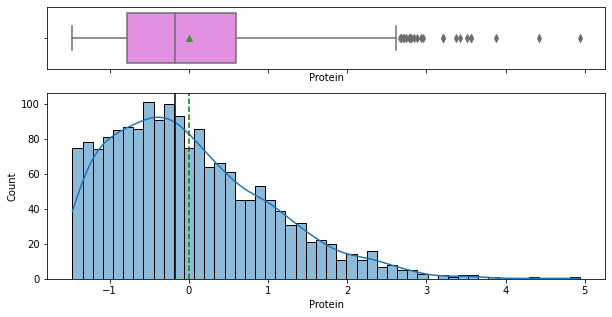

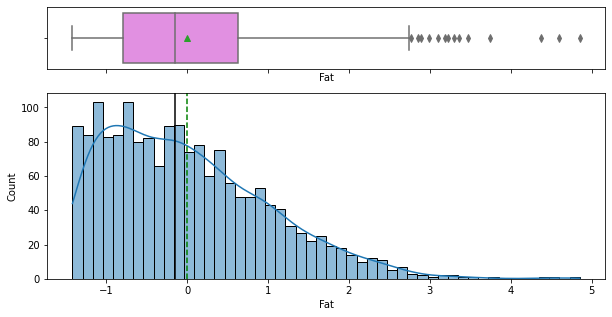

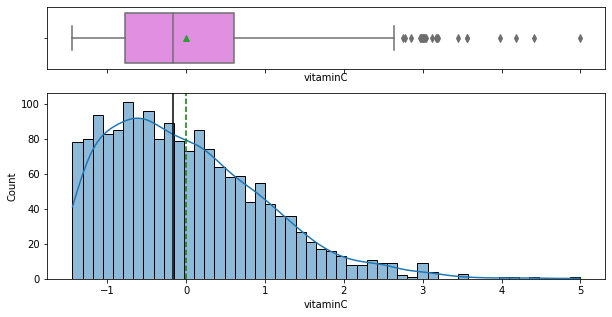

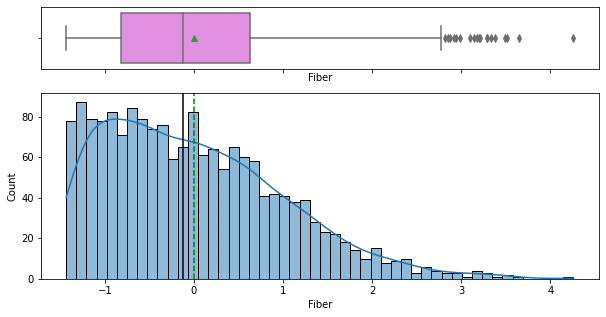

In [11]:
# selecting numerical columns
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df1, item, bins=50, kde=True, figsize=(10, 5))

### Bivariate Analysis

**Let's check for correlations.**

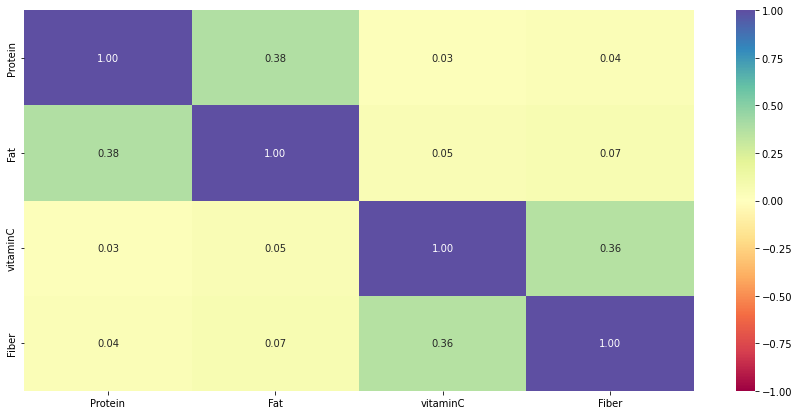

In [12]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df1[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing

### Checking for Null Values

In [13]:
# checking for missing values

df1.isnull().sum()

Protein     0
Fat         0
vitaminC    0
Fiber       0
Product     0
dtype: int64

In [17]:
# selecting numerical columns
num_col = df1.select_dtypes(include=np.number).columns.tolist()

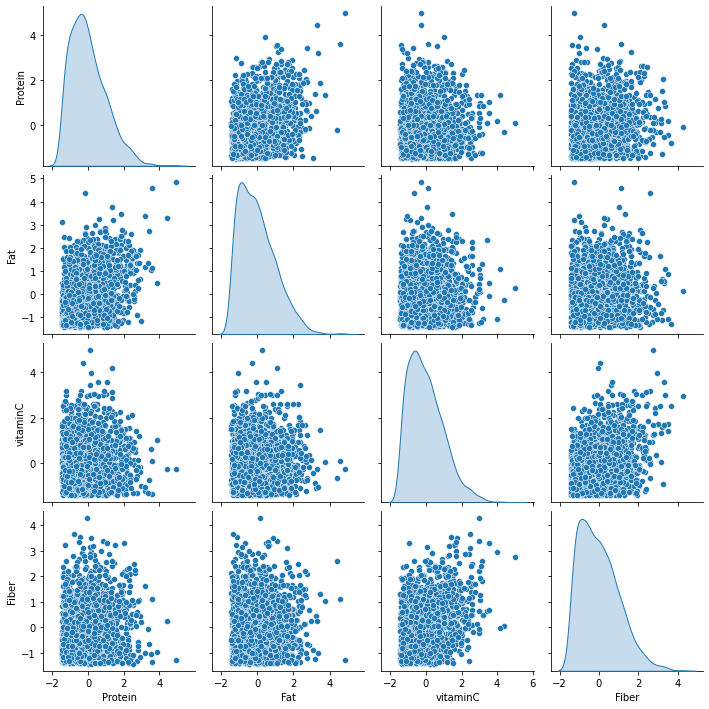

In [18]:
sns.pairplot(data=df1[num_col], diag_kind="kde")
plt.show()

#### Standard Scaler
StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

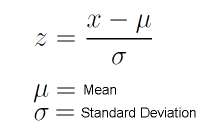

1. Data standardization is the process of rescaling the attributes so that they have a mean of 0 and a variance of 1.
2. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.
3. In sklearn.preprocessing.StandardScaler(), centering and scaling happen independently on each feature.

In [19]:
subset_scaled_df = df1[num_col].copy()

In [20]:
# sc = StandardScaler()
# subset_scaled_df = pd.DataFrame(
#     sc.fit_transform(df1.drop(["country", "Region"], axis=1)),
#     columns=df1.drop(["country", "Region"], axis=1).columns,
# )
# subset_scaled_df.head()

Let's find the Cophenetic correlation for different distances with different linkage methods.

### What is Cophenetic correlation? 

The cophenetic correlation coefficient is a correlation coefficient between the cophenetic distances(Dendrogramic distance) obtained from the tree, and the original distances used to construct the tree. It is a measure of how faithfully a dendrogram preserves the pairwise distances between the original unmodeled data points. 

The cophenetic distance between two observations is represented in a dendrogram by the height of the link at which those two observations are first joined. That height is the distance between the two subclusters that are merged by that link.

Cophenetic correlation is the way to compare two or more dendrograms. 

In [31]:
# list of distance metrics
# distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
distance_metrics = ["mahalanobis"]

# list of linkage methods
linkage_methods = ["single", "complete"]#, "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Mahalanobis distance and single linkage is 0.6695240907829251.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.5489998478410857.


In [22]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6834725971496097, which is obtained with Chebyshev distance and single linkage.


**Let's explore different linkage methods with Chebyshev distance only.**

In [32]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
# linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6811464508136775.
Cophenetic correlation for complete linkage is 0.4869572069300987.
Cophenetic correlation for average linkage is 0.6521952320780484.
Cophenetic correlation for centroid linkage is 0.6623548586629197.
Cophenetic correlation for ward linkage is 0.4578661967170403.
Cophenetic correlation for weighted linkage is 0.5964392177608361.


In [38]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.6811464508136775, which is obtained with single linkage.


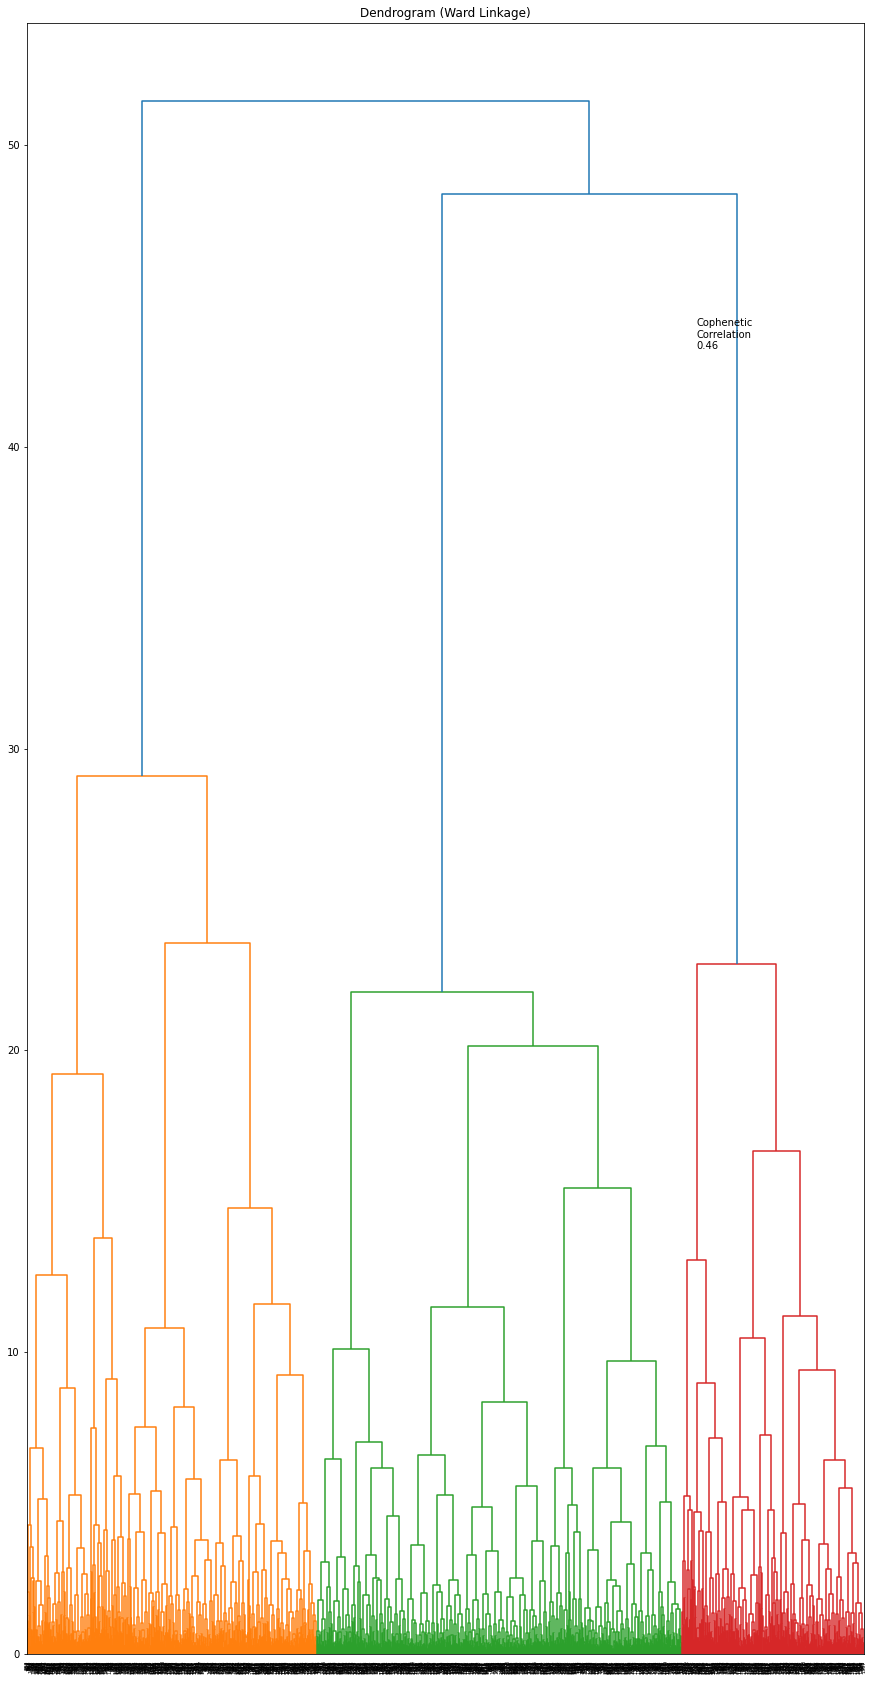

In [40]:
# list of linkage methods
linkage_methods = ["ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

**Let's see the dendrograms for the different linkage methods.**

In [29]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Error in callback <function flush_figures at 0x7fbbc4918dc0> (for post_execute):


KeyboardInterrupt: 

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with Centroid linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for Centroid linkage.

**The optimal number of clusters from a dendrogram can be obtained by deciding where to cut the cluster tree. Generally, the cluster tree is cut where dendrogram height is maximum as it generally corresponds to distinct and homogeneous clusters.
The dendrogram for centroid linkage had the highest cophenetic correlation. So we can use centroid linkage and have chosen 6 clusters as the dendrogram height is pretty high. (The maximum height is for 3, but that would not be meaningful as it would give two clusters with one country each and one cluster will all the other countries).**

**Lets visualize the dendrogram cut for average link in the below plot**

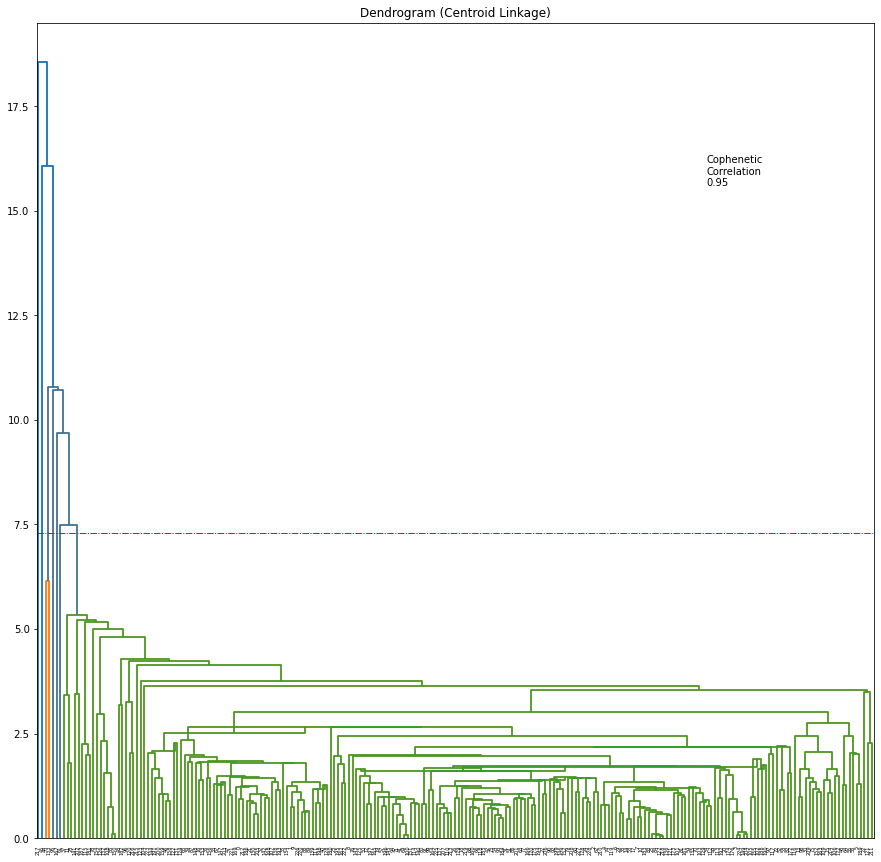

In [59]:
# list of linkage methods
linkage_methods = ["centroid"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=7.3)
plt.axhline(y=7.3, c="red", lw=1, linestyle="dashdot")

## Hierarchical Clustering

In [41]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=3)

In [42]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

In [48]:
df1[df1["HC_Clusters"] == 2]['Product'].value_counts()

Alcoholic beverage, wine, beer                                        462
Chicken, broilers or fryers, raw                                       20
Bean, sporouted seeds                                                  11
Infant formula, GERBER, GOOD START 2 Soy, with iron, ready-to-feed      1
Martha White Foods, Martha White's Chewy Fudge Brownie Mix, dry         1
                                                                     ... 
Cookies, fig bars                                                       1
Chicken, broilers or fryers, leg, meat only, cooked, fried              1
Cookies, oatmeal, commercially prepared, regular                        1
Cookies, oatmeal, commercially prepared, special dietary                1
Fish, bluefish, raw                                                     1
Name: Product, Length: 272, dtype: int64

## Cluster Profiling

In [24]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [25]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Surface area"].count().values
)

In [26]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df1[df1["HC_Clusters"] == cl]["country"].unique())
    print()

In cluster 0, the following countries are present:
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile'
 'China, Hong Kong SAR' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea'
 'Estonia' 'Ethiopia' 'Falkland Islands (Malvinas)' 'F

**Note:** **China** and **China, Macao SAR** are two different countries in the dataset.

**We see that there are 5 clusters of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**On checking the cluster profiles, it's found centroid linkage still does not give proper clustering as 5 clusters have one or two countries in them. On checking the dendrogram for different linkages further, the Ward linkage gives us homogeneous clusters, with more variability between clusters, despite a low cophenetic correlation. Let us try using Ward linkage as it has more distinct and separated clusters (as seen from its dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

**Lets visualize the dendrogram cut for ward linkage in the below plot**

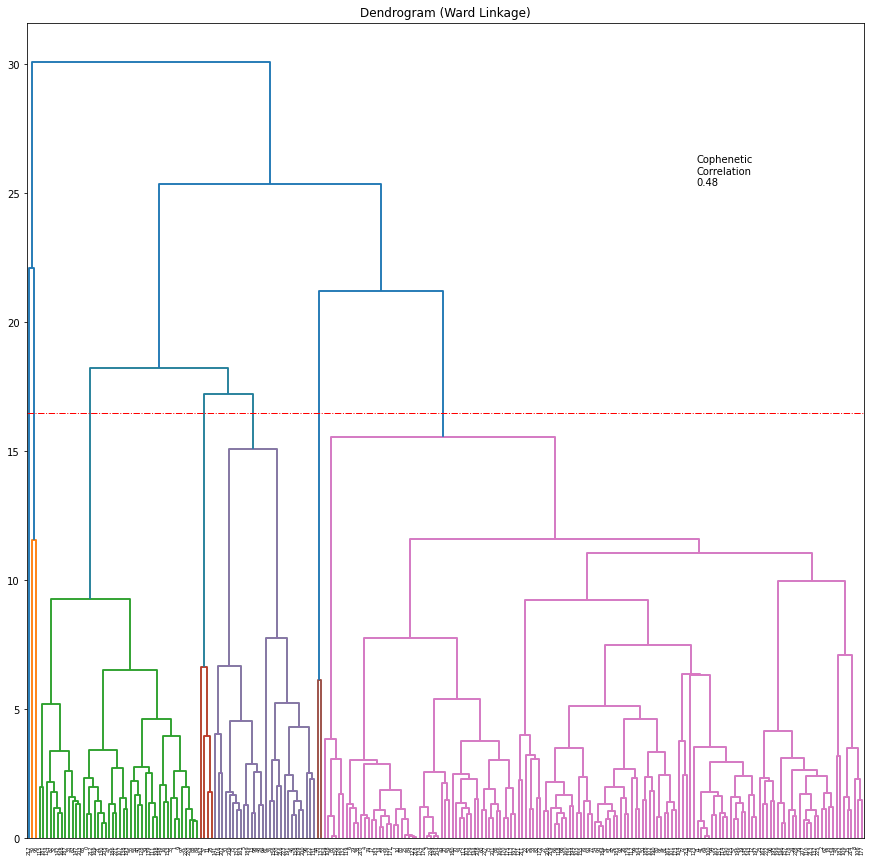

In [27]:
# list of linkage methods
linkage_methods = ["ward"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=16.5)
plt.axhline(y=16.5, c="red", lw=1, linestyle="dashdot")

In [28]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [29]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [30]:
cluster_profile = df1.groupby("HC_Clusters").mean()

In [31]:
cluster_profile["count_in_each_segments"] = (
    df1.groupby("HC_Clusters")["Surface area"].count().values
)

In [32]:
# let's see the names of the countries in each cluster
for cl in df1["HC_Clusters"].unique():
    print(
        "The",
        df1[df1["HC_Clusters"] == cl]["country"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df1[df1["HC_Clusters"] == cl]["country"].unique())
    print("-" * 100, "\n")

The 44 countries in cluster 5 are:
['Afghanistan' 'Albania' 'Armenia' 'Bangladesh' 'Benin' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Central African Republic' 'Chad' 'Comoros'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Eritrea' 'Ethiopia' 'Guinea-Bissau'
 'Guinea' 'Guyana' 'Iran (Islamic Republic of)' 'Kenya'
 "Lao People's Democratic Republic" 'Liberia' 'Mali' 'Mauritania'
 'Mayotte' 'Mozambique' 'Myanmar' 'Nepal' 'Niger' 'Nigeria' 'Pakistan'
 'Rwanda' 'Saint Helena' 'Sierra Leone' 'Solomon Islands' 'Somalia'
 'Sudan' 'Syrian Arab Republic' 'Togo' 'Tonga' 'Uganda' 'Uzbekistan'
 'Vanuatu' 'Yemen']
---------------------------------------------------------------------------------------------------- 

The 148 countries in cluster 2 are:
['Algeria' 'American Samoa' 'Andorra' 'Anguilla' 'Antigua and Barbuda'
 'Argentina' 'Aruba' 'Austria' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bonair

**Now the clusters seem to have more variability.**

In [33]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Surface area,Population in thousands,Population density,GDP: Gross domestic product,Economy: Agriculture,Economy: Industry,Economy: Services and other activity,International trade: Balance,Health: Total expenditure,Education: Government expenditure,Mobile-cellular subscriptions,Individuals using the Internet,count_in_each_segments
HC_Clusters,,,,,,,,,,,,,
0,1857323.781250,45709.656250,97.065625,329348.031250,8.393750,43.871875,47.746875,4106.187500,4.906250,4.314063,107.571875,551.812500,32
1,6443631.500000,1374348.500000,300.250000,6637348.000000,13.100000,35.400000,51.450000,216953.500000,5.100000,3.700000,86.000000,1066.000000,2
2,220764.489865,10516.020270,331.800676,213967.959459,6.521284,24.186149,68.686149,915.722973,7.706081,5.362162,115.291216,120.317568,148
3,9833517.000000,324460.000000,35.500000,18036648.000000,1.000000,19.700000,79.300000,-796494.000000,17.100000,5.400000,117.600000,1513.000000,1
4,16.000000,331.000000,23395.700000,26218.000000,3.225000,10.000000,90.000000,8826.500000,5.375000,1.500000,206.600000,16.000000,2
5,460865.261364,32009.250000,144.247727,46650.704545,28.867045,23.895455,46.960227,-882.261364,5.530682,3.723864,69.051136,147.613636,44


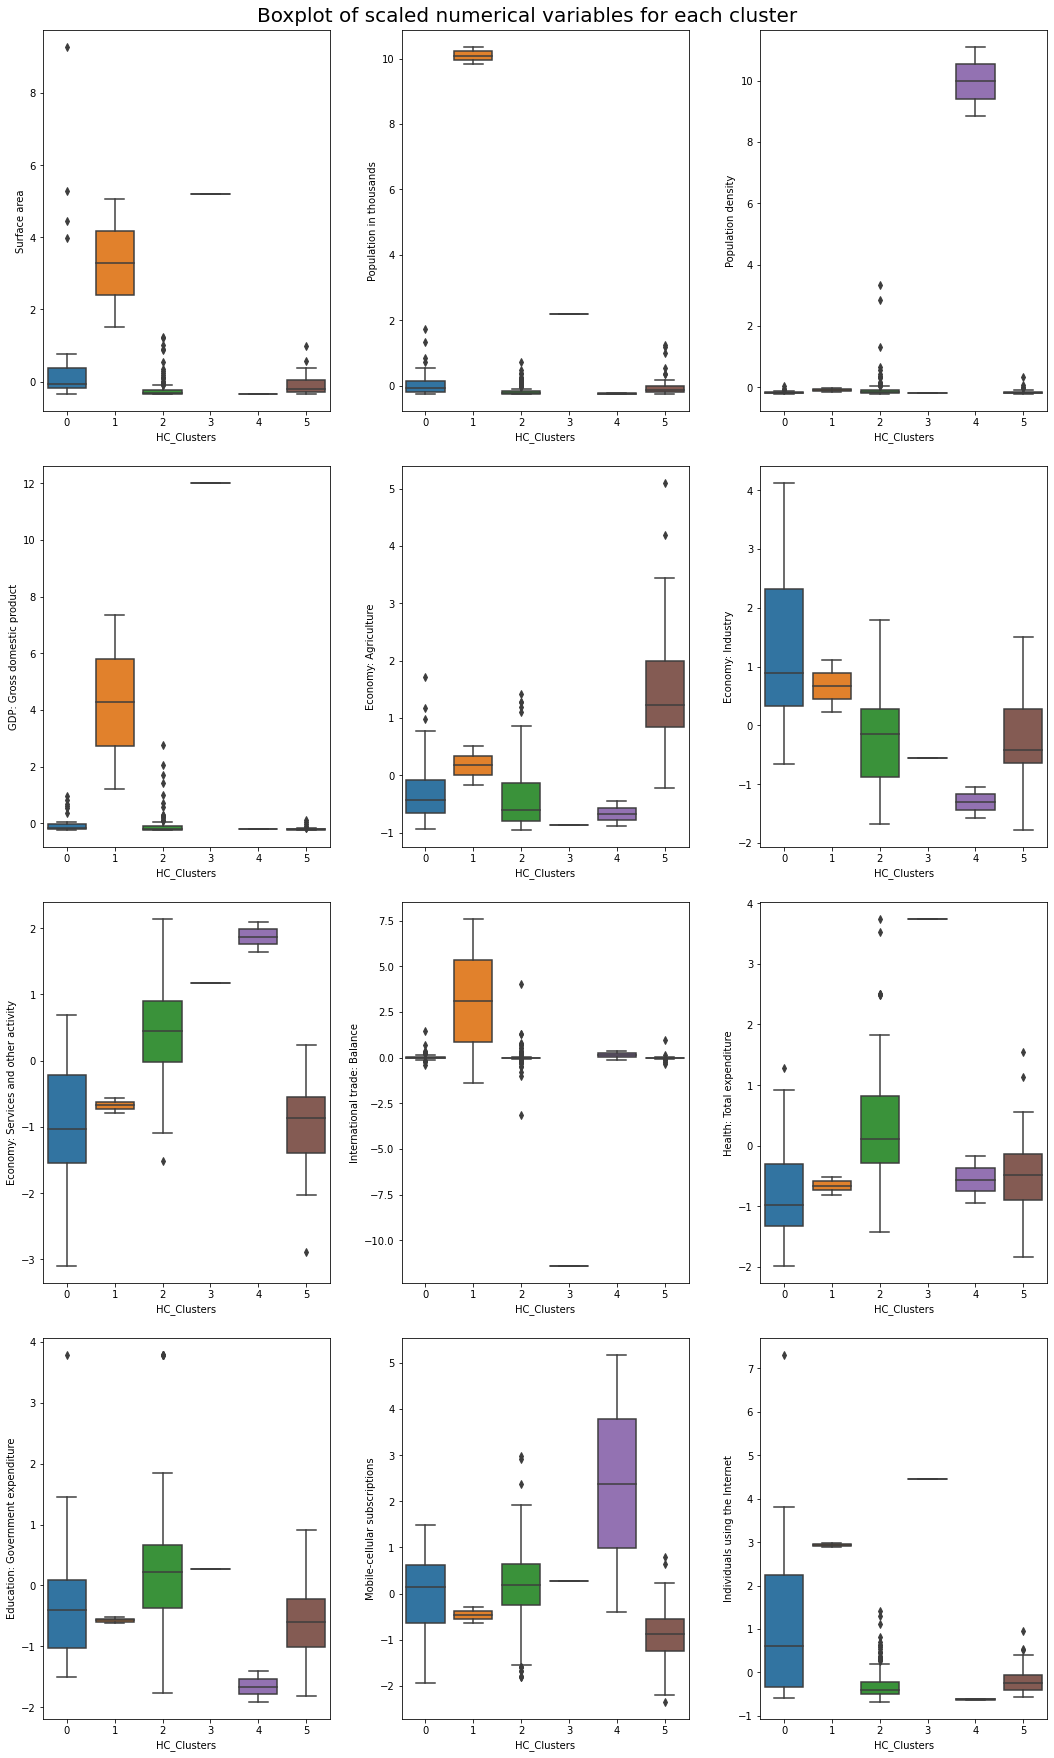

In [34]:
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

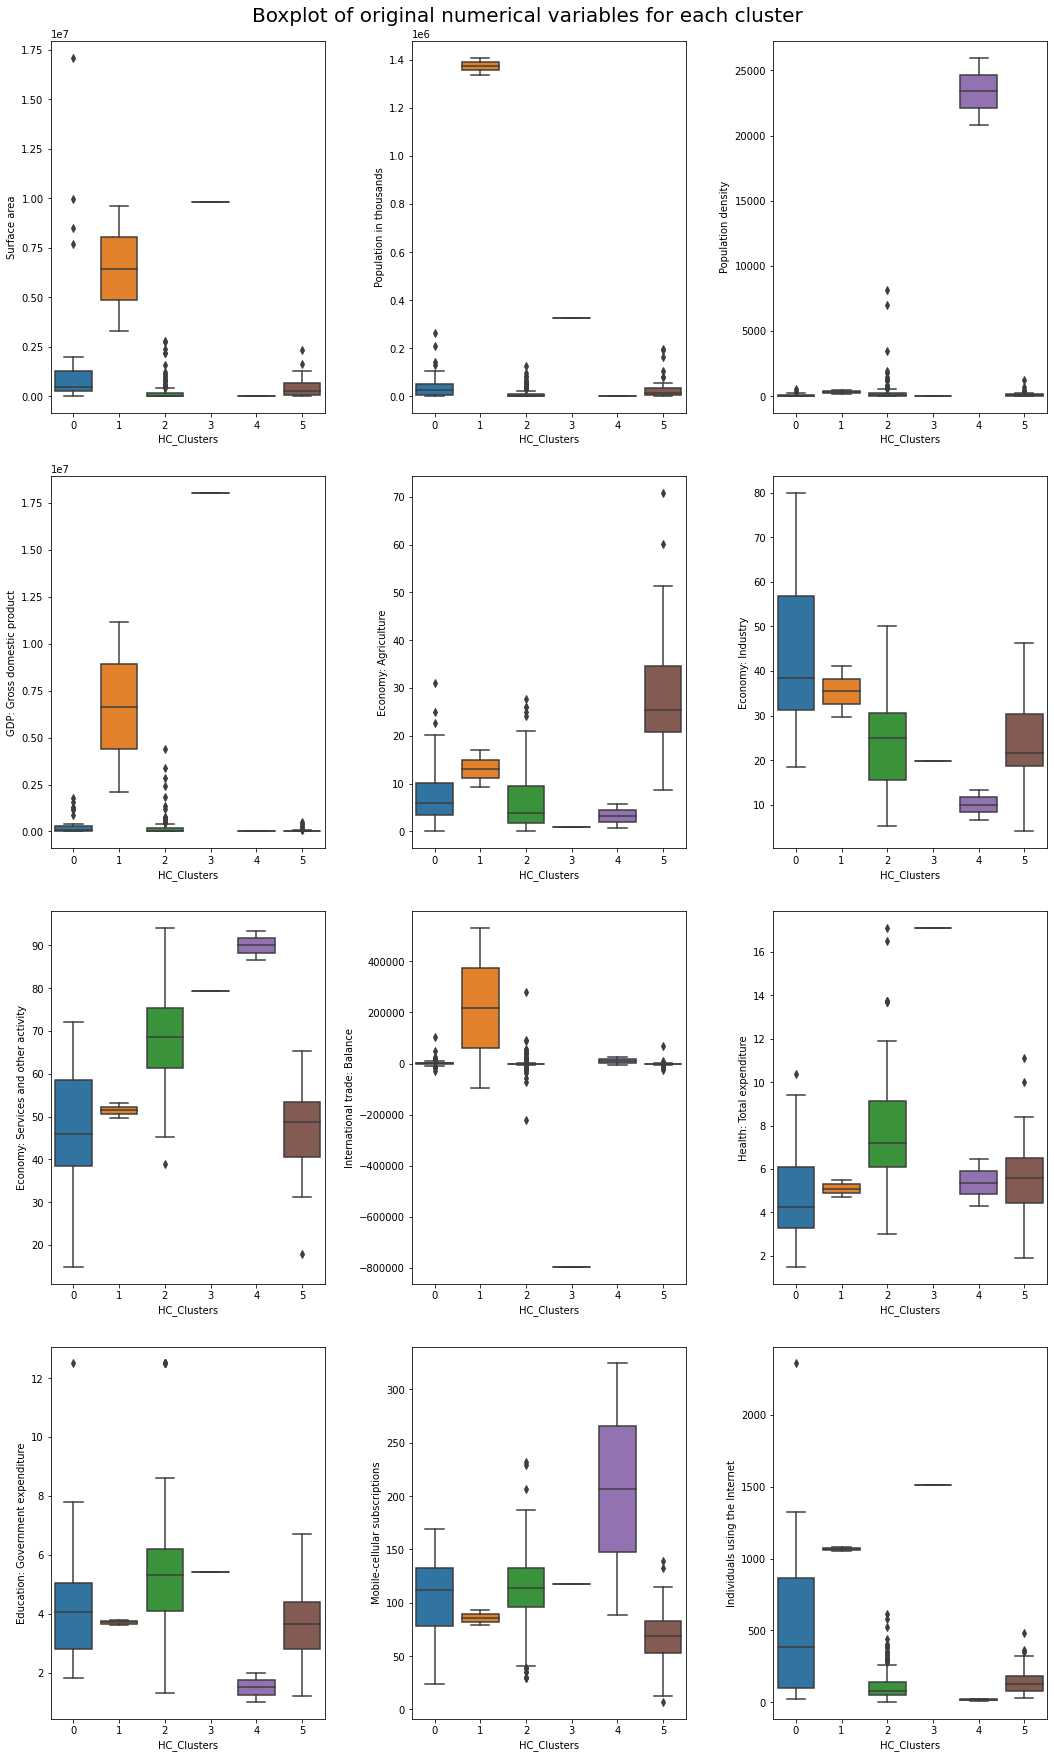

In [35]:
fig, axes = plt.subplots(4, 3, figsize=(15, 25))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(ax=axes[ii][0], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][1], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1
    sns.boxplot(ax=axes[ii][2], y=df1[num_cols[counter]], x=df1["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 0, 2, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 32 countries in this cluster.
   - The number of individuals using the internet is moderate and mobile subscribers are moderate.
   - Expenditure on health is low to moderate and that on education is also low to moderate.
   - GDP is low, but the economy in healthy and balanced across agriculture, industry, services, and other activities are high
   
   
- **Cluster 2**
   - There are 148 countries in this cluster.
   - The number of individuals using the internet is high but mobile subscribers are moderate.
   - Expenditure on health is moderate and that on education is also moderate.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.
   
   
- **Cluster 5**
   - There are 44 countries in this cluster.
   - The number of individuals using the internet are moderate and mobile subscribers are also moderate.
   - Expenditure on health is moderate and that on education is low.
   - GDP is moderate and economy is moderately healthy with a slightly high dependence on services and other activities.


## Recommendations

**Cluster 5 countries are good places to provide tourism services based on cluster profiling done above.**

## Dimensionality Reduction using PCA for visualization

- Let's use PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are.

In [58]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca,
)

In [59]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.67761905754969

- The first two principal components explain 48.5% of the variance in the data.

In [38]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

ValueError: Data must be 1-dimensional

- We can kind of see two broad clusters if we draw a horizontal line around y=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

In [ ]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0,2 and 5 are the major clusters.

##### Happy Learning!